In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import  metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [ ]:
pd.set_option('max_colwidth', 100)

In [ ]:
data =  pd.read_csv('/content/drive/MyDrive/Skill Genie Internship/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked....,positive
1,A wonderful little production. <br /><br />The filming technique is very unassuming- very old-ti...,positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...",positive
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei off...",positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
#Select 2000 reviews for the experiments
df=data[:2000]

In [ ]:
df.shape

(2000, 2)

In [ ]:
# check the columns names
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
#total words before cleaning
data_len = df['review'].apply(lambda x: len(x.split(' '))).sum()
print(f'We have {data_len} words in the reviews')

We have 452798 words in the reviews


In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

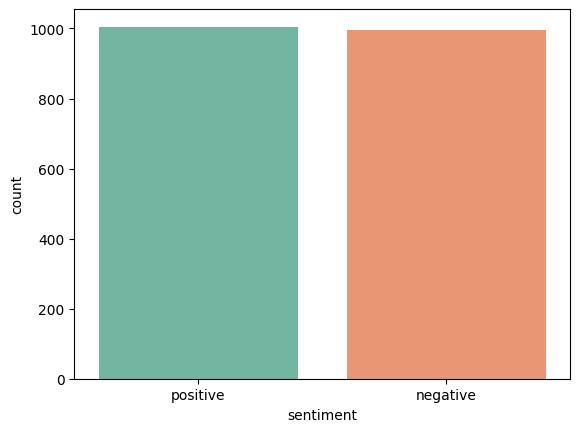

In [ ]:
#checking the value counts in 'sentiment' column
sentiment_counts = df['sentiment'].value_counts()
sns.countplot(x=df['sentiment'], palette=['#66c2a5'] * (len(sentiment_counts) - 1) + ['#fc8d62'])

# Show the plot
plt.show()

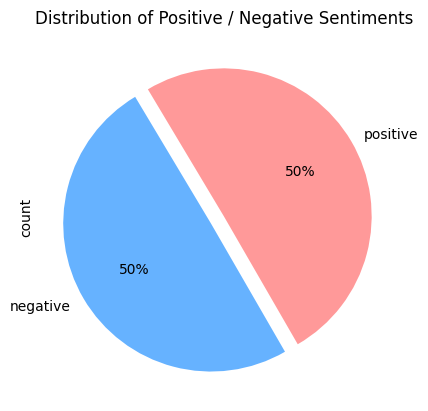

In [ ]:
colors = ['#FF9999', '#66B2FF']

df['sentiment'].value_counts().plot.pie(explode=[0, 0.1], autopct='%2.0f%%', startangle=300, colors=colors)
plt.title("Distribution of Positive / Negative Sentiments")
plt.show()

In [ ]:
df.groupby(['sentiment'])[['sentiment']].count()

,sentiment
sentiment,
negative,995
positive,1005


In [ ]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [ ]:
df['word_count'] = df['review'].apply(no_of_words)

<ipython-input-15-306acd83cfb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['review'].apply(no_of_words)


In [ ]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked....,positive,307
1,A wonderful little production. <br /><br />The filming technique is very unassuming- very old-ti...,positive,162
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...",positive,166
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei off...",positive,230


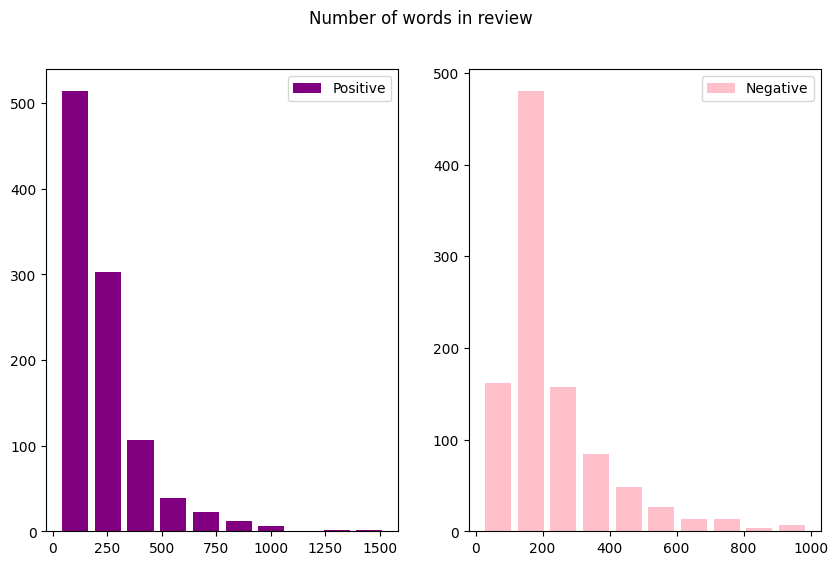

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word_count'], label='Positive', color='purple', rwidth=0.8);
ax[1].hist(df[df['sentiment'] == 'negative']['word_count'], label='Negative', color='pink', rwidth=0.8);

ax[0].legend(loc='upper right');
ax[1].legend(loc='upper right');

fig.suptitle("Number of words in review")
plt.show()

In [ ]:
#convert positive label to 1 and negatve to 0
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

<ipython-input-18-b3361d096a80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [ ]:
# first ten negative reviews
df_serious = df[df['sentiment']==0].head(10)
df_serious[['review']]

,review
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...
7,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o..."
8,Encouraged by the positive comments about this film on here I was looking forward to watching th...
10,Phil the Alien is one of those quirky films where the humour is based around the oddness of ever...
11,I saw this movie when I was about 12 when it came out. I recall the scariest scene was the big b...
12,So im not a big fan of Boll's work but then again not many are. I enjoyed his movie Postal (mayb...
13,The cast played Shakespeare.<br /><br />Shakespeare lost.<br /><br />I appreciate that this is t...
15,"Kind of drawn in by the erotic scenes, only to realize this was one of the most amateurish and u..."
17,This movie made it into one of my top 10 most awful movies. Horrible. <br /><br />There wasn't a...
19,An awful film! It must have been up against some real stinkers to be nominated for the Golden Gl...


In [ ]:
df_serious2 = df[df['sentiment']==1].head(10)
df_serious2[['review']]

,review
0,One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked....
1,A wonderful little production. <br /><br />The filming technique is very unassuming- very old-ti...
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air..."
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei off..."
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl..."
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...
9,If you like original gut wrenching laughter you will like this movie. If you are young or old th...
14,This a fantastic movie of three prisoners who become famous. One of the actors is george clooney...
16,Some films just simply should not be remade. This is one of them. In and of itself it is not a b...
18,"I remember this film,it was the first film i had watched at the cinema the picture was dark in p..."


In [ ]:
df

,review,sentiment,word_count
0,One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked....,1,307
1,A wonderful little production. <br /><br />The filming technique is very unassuming- very old-ti...,1,162
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...",1,166
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei off...",1,230
...,...,...,...
1995,"Feeling Minnesota, directed by Steven Baigelmann, and starring Keanu Reeves, Cameron Diaz and Vi...",0,110
1996,"THE CELL (2000) Rating: 8/10<br /><br />The Cell, like Antz, must be watched twice to be appreci...",1,196
1997,"This movie, despite its list of B, C, and D list celebs, is a complete waste of 90 minutes. The ...",0,154
1998,"I loved this movie! It was all I could do not to break down into tears while watching it, but it...",1,82


In [ ]:
for i in range(2):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

#Data Cleaning

In [ ]:
# check the null values in data
df.isna().sum()

review        0
sentiment     0
word_count    0
dtype: int64

In [ ]:
import re

def process(review):
    review = review.lower()
    review = re.sub("[^a-zA-Z]", ' ', review)
    review = re.sub(r"https\S+|www\S+|http\S+", '', review, flags=re.MULTILINE)
    review = re.sub(r'\@\w+|\#', '', review)
    review = re.sub(r'[^\w\s]', '', review)
    return review

# Apply the process function to the 'review' column of your DataFrame
df['review'] = df['review'].apply(process)

<ipython-input-24-fa8057e232fa>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(process)


In [ ]:
df.head(10)

,review,sentiment,word_count
0,one of the other reviewers has mentioned that after watching just oz episode you ll be hooked ...,1,307
1,a wonderful little production br br the filming technique is very unassuming very old ti...,1,162
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air...,1,166
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his...,0,138
4,petter mattei s love in the time of money is a visually stunning film to watch mr mattei off...,1,230
5,probably my all time favorite movie a story of selflessness sacrifice and dedication to a nobl...,1,119
6,i sure would like to see a resurrection of a up dated seahunt series with the tech they have tod...,1,150
7,this show was an amazing fresh innovative idea in the s when it first aired the first o...,0,174
8,encouraged by the positive comments about this film on here i was looking forward to watching th...,0,130
9,if you like original gut wrenching laughter you will like this movie if you are young or old th...,1,33


In [ ]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  0


In [ ]:
df = df.drop_duplicates('review')

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenize(column):

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

In [ ]:
df['tokenized'] = df.apply(lambda x: tokenize(x['review']), axis=1)


In [ ]:
df.head()

,review,sentiment,word_count,tokenized
0,one of the other reviewers has mentioned that after watching just oz episode you ll be hooked ...,1,307,"[one, of, the, other, reviewers, has, mentioned, that, after, watching, just, oz, episode, you, ..."
1,a wonderful little production br br the filming technique is very unassuming very old ti...,1,162,"[a, wonderful, little, production, br, br, the, filming, technique, is, very, unassuming, very, ..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air...,1,166,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, si..."
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his...,0,138,"[basically, there, s, a, family, where, a, little, boy, jake, thinks, there, s, a, zombie, in, h..."
4,petter mattei s love in the time of money is a visually stunning film to watch mr mattei off...,1,230,"[petter, mattei, s, love, in, the, time, of, money, is, a, visually, stunning, film, to, watch, ..."


In [ ]:
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Stopwords removal
def remove_stopwords(tokenized_column):
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]

In [ ]:
df['stopwords_removed'] = df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
df[['review', 'stopwords_removed']].head()

,review,stopwords_removed
0,one of the other reviewers has mentioned that after watching just oz episode you ll be hooked ...,"[one, reviewers, mentioned, watching, oz, episode, hooked, right, exactly, happened, br, br, fir..."
1,a wonderful little production br br the filming technique is very unassuming very old ti...,"[wonderful, little, production, br, br, filming, technique, unassuming, old, time, bbc, fashion,..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air...,"[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater,..."
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his...,"[basically, family, little, boy, jake, thinks, zombie, closet, parents, fighting, time, br, br, ..."
4,petter mattei s love in the time of money is a visually stunning film to watch mr mattei off...,"[petter, mattei, love, time, money, visually, stunning, film, watch, mr, mattei, offers, us, viv..."


In [ ]:
#Stemming
from nltk.stem.porter import PorterStemmer
def apply_stemming(tokenized_column):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokenized_column]

In [ ]:
df['Stemming'] = df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
df[['review', 'Stemming']].head()

,review,Stemming
0,one of the other reviewers has mentioned that after watching just oz episode you ll be hooked ...,"[one, review, mention, watch, oz, episod, hook, right, exactli, happen, br, br, first, thing, st..."
1,a wonderful little production br br the filming technique is very unassuming very old ti...,"[wonder, littl, product, br, br, film, techniqu, unassum, old, time, bbc, fashion, give, comfort..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air...,"[thought, wonder, way, spend, time, hot, summer, weekend, sit, air, condit, theater, watch, ligh..."
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his...,"[basic, famili, littl, boy, jake, think, zombi, closet, parent, fight, time, br, br, movi, slowe..."
4,petter mattei s love in the time of money is a visually stunning film to watch mr mattei off...,"[petter, mattei, love, time, money, visual, stun, film, watch, mr, mattei, offer, us, vivid, por..."


In [ ]:
def rejoin_words(tokenized_column):
    return ( " ".join(tokenized_column))

In [ ]:
df['Clean_Data'] = df.apply(lambda x: rejoin_words(x['Stemming']), axis=1)
df[['review', 'Clean_Data']].head()

,review,Clean_Data
0,one of the other reviewers has mentioned that after watching just oz episode you ll be hooked ...,one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal ...
1,a wonderful little production br br the filming technique is very unassuming very old ti...,wonder littl product br br film techniqu unassum old time bbc fashion give comfort sometim disco...
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air...,thought wonder way spend time hot summer weekend sit air condit theater watch light heart comedi...
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his...,basic famili littl boy jake think zombi closet parent fight time br br movi slower soap opera su...
4,petter mattei s love in the time of money is a visually stunning film to watch mr mattei off...,petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human rel...


In [ ]:
df.head()

,review,sentiment,word_count,tokenized,stopwords_removed,Stemming,Clean_Data
0,one of the other reviewers has mentioned that after watching just oz episode you ll be hooked ...,1,307,"[one, of, the, other, reviewers, has, mentioned, that, after, watching, just, oz, episode, you, ...","[one, reviewers, mentioned, watching, oz, episode, hooked, right, exactly, happened, br, br, fir...","[one, review, mention, watch, oz, episod, hook, right, exactli, happen, br, br, first, thing, st...",one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal ...
1,a wonderful little production br br the filming technique is very unassuming very old ti...,1,162,"[a, wonderful, little, production, br, br, the, filming, technique, is, very, unassuming, very, ...","[wonderful, little, production, br, br, filming, technique, unassuming, old, time, bbc, fashion,...","[wonder, littl, product, br, br, film, techniqu, unassum, old, time, bbc, fashion, give, comfort...",wonder littl product br br film techniqu unassum old time bbc fashion give comfort sometim disco...
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air...,1,166,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, si...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater,...","[thought, wonder, way, spend, time, hot, summer, weekend, sit, air, condit, theater, watch, ligh...",thought wonder way spend time hot summer weekend sit air condit theater watch light heart comedi...
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his...,0,138,"[basically, there, s, a, family, where, a, little, boy, jake, thinks, there, s, a, zombie, in, h...","[basically, family, little, boy, jake, thinks, zombie, closet, parents, fighting, time, br, br, ...","[basic, famili, littl, boy, jake, think, zombi, closet, parent, fight, time, br, br, movi, slowe...",basic famili littl boy jake think zombi closet parent fight time br br movi slower soap opera su...
4,petter mattei s love in the time of money is a visually stunning film to watch mr mattei off...,1,230,"[petter, mattei, s, love, in, the, time, of, money, is, a, visually, stunning, film, to, watch, ...","[petter, mattei, love, time, money, visually, stunning, film, watch, mr, mattei, offers, us, viv...","[petter, mattei, love, time, money, visual, stun, film, watch, mr, mattei, offer, us, vivid, por...",petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human rel...


In [ ]:
columns_to_drop = ['tokenized', 'stopwords_removed', 'Stemming']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

,review,sentiment,word_count,Clean_Data
0,one of the other reviewers has mentioned that after watching just oz episode you ll be hooked ...,1,307,one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal ...
1,a wonderful little production br br the filming technique is very unassuming very old ti...,1,162,wonder littl product br br film techniqu unassum old time bbc fashion give comfort sometim disco...
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air...,1,166,thought wonder way spend time hot summer weekend sit air condit theater watch light heart comedi...
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his...,0,138,basic famili littl boy jake think zombi closet parent fight time br br movi slower soap opera su...
4,petter mattei s love in the time of money is a visually stunning film to watch mr mattei off...,1,230,petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human rel...


In [ ]:
#Word count of each  clean review
df['new_word_count'] = df['Clean_Data'].apply(no_of_words)
df.head()

,review,sentiment,word_count,Clean_Data,new_word_count
0,one of the other reviewers has mentioned that after watching just oz episode you ll be hooked ...,1,307,one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal ...,168
1,a wonderful little production br br the filming technique is very unassuming very old ti...,1,162,wonder littl product br br film techniqu unassum old time bbc fashion give comfort sometim disco...,92
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air...,1,166,thought wonder way spend time hot summer weekend sit air condit theater watch light heart comedi...,88
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his...,0,138,basic famili littl boy jake think zombi closet parent fight time br br movi slower soap opera su...,70
4,petter mattei s love in the time of money is a visually stunning film to watch mr mattei off...,1,230,petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human rel...,133


In [ ]:
#Total words after cleaning
data_clean_len = df['Clean_Data'].apply(lambda x: len(x.split(' '))).sum()
print(f'After text cleaning we have only {data_clean_len} words to work with')

After text cleaning we have only 239712 words to work with


In [ ]:
from collections import Counter
text = df['Clean_Data']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0)

In [ ]:
result_df

,index,0,1
1,1,br,8098
2,2,movi,4225
3,3,film,3711
4,4,one,2118
5,5,like,1719
...,...,...,...
17120,17120,nitpicki,1
17121,17121,tenenbaum,1
17122,17122,meritori,1
17123,17123,mew,1


In [ ]:
#create DataFrame for positive sentiment
positive_sentiment = pd.DataFrame(df[df['sentiment']==1]['Clean_Data'].str.split(expand=True).unstack().value_counts()).reset_index()


In [ ]:
positive_sentiment

,index,count
0,br,3982
1,film,1926
2,movi,1879
3,one,1095
4,like,794
...,...,...
12610,preced,1
12611,aldo,1
12612,sambrel,1
12613,blur,1


In [ ]:
#create DataFrame for negtaive sentiment
negative_sentiment= pd.DataFrame(df[df['sentiment']==0]['Clean_Data'].str.split(expand=True).unstack().value_counts()).reset_index()

In [ ]:
negative_sentiment

,index,count
0,br,4116
1,movi,2346
2,film,1785
3,one,1023
4,like,925
...,...,...
11601,lauderdal,1
11602,xma,1
11603,hewitt,1
11604,sivaji,1


In [ ]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

pos_sentiment_2 = [every_word.lower() for every_word in positive_sentiment['index']]

pos_nonstop = [word for word in pos_sentiment_2 if word not in stopwords]

neg_sentiment_2 = [every_word.lower() for every_word in negative_sentiment['index']]

neg_nonstop = [word for word in neg_sentiment_2 if word not in stopwords]


In [ ]:
!pip install wordcloud

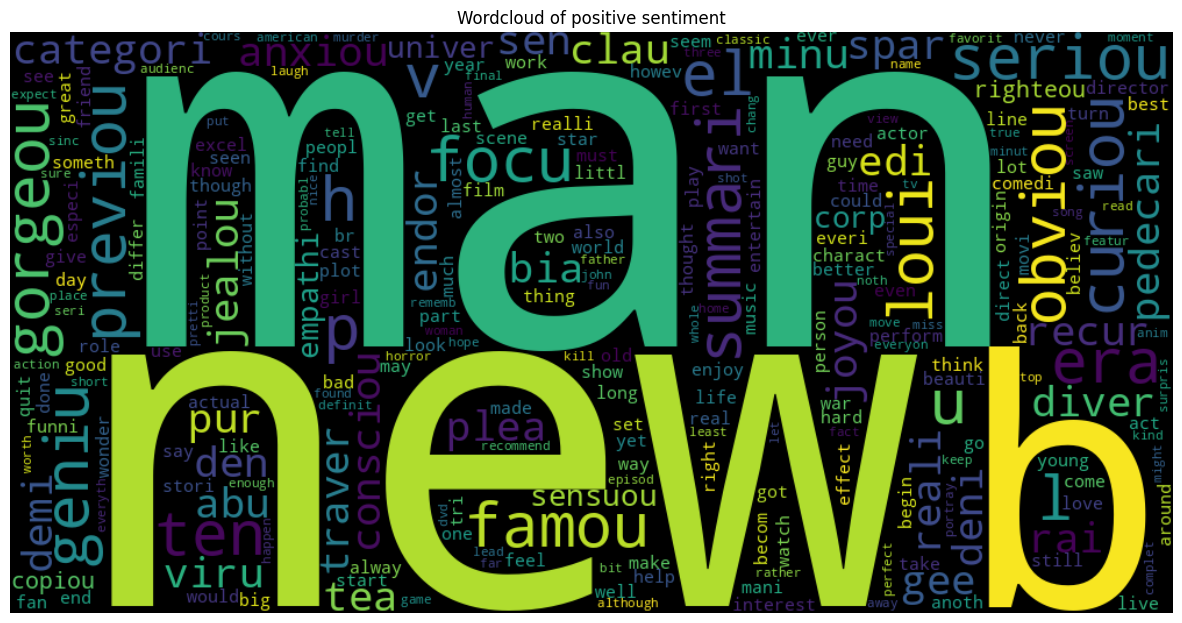

In [ ]:
#Wordcloud of positive sentiment
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords,
                      ).generate(' ' .join(word for word in pos_nonstop))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of positive sentiment', color="black")
plt.axis("off")
plt.show()

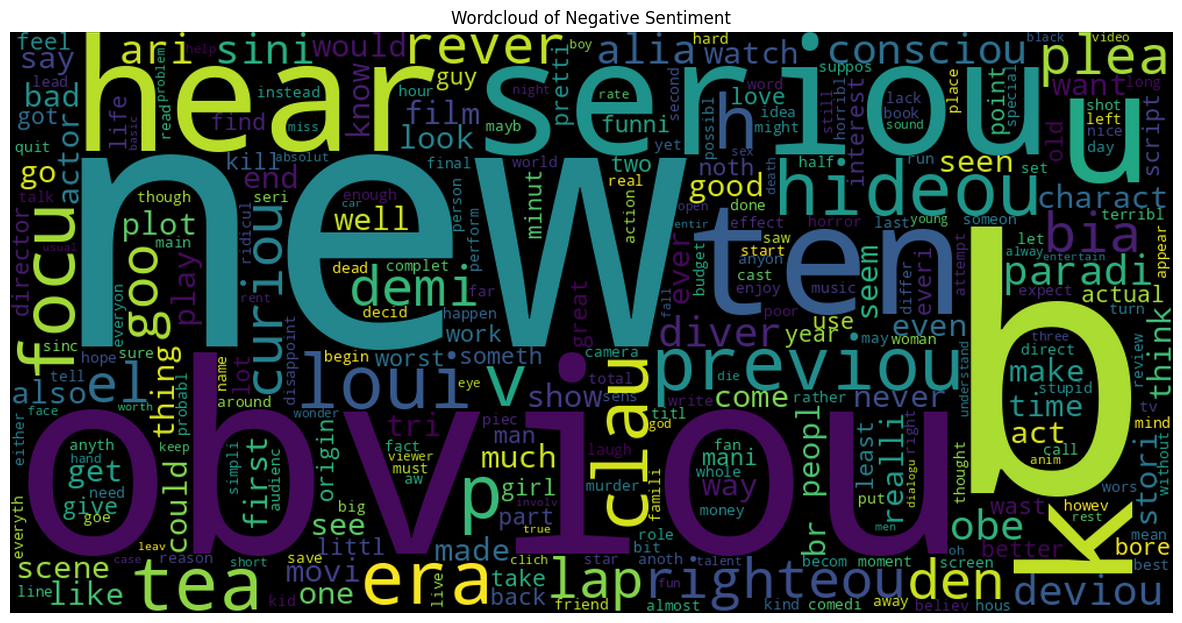

In [ ]:
#Wordcloud of negative sentiment
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords,
                      ).generate(' ' .join(word for word in neg_nonstop))

plt.imshow(wordcloud, interpolation='spline36')
plt.title('Wordcloud of Negative Sentiment', color="black")
plt.axis("off")
plt.show()

#Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
bow = tv.fit_transform(df['Clean_Data'])
bow = np.array(bow.todense())

In [ ]:
X = bow
y = df['sentiment']

#Train_Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#Deep Learning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Using three layers
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
#optimizer rmsprop
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
160/160 [==============================] - 4s 3ms/step - loss: 0.6638 - accuracy: 0.6581
Epoch 2/15
160/160 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.8725
Epoch 3/15
160/160 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.9444
Epoch 4/15
160/160 [==============================] - 0s 3ms/step - loss: 0.1677 - accuracy: 0.9762
Epoch 5/15
160/160 [==============================] - 1s 4ms/step - loss: 0.0835 - accuracy: 0.9869
Epoch 6/15
160/160 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9912
Epoch 7/15
160/160 [==============================] - 1s 3ms/step - loss: 0.0218 - accuracy: 0.9969
Epoch 8/15
160/160 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9981
Epoch 9/15
160/160 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9994
Epoch 10/15
160/160 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                273712    
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273857 (1.04 MB)
Trainable params: 273857 (1.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#loss and accuracy on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

13/13 [==============================] - 0s 7ms/step - loss: 0.6021 - accuracy: 0.8125
Test loss: 0.6021131277084351
Test accuracy: 0.8125


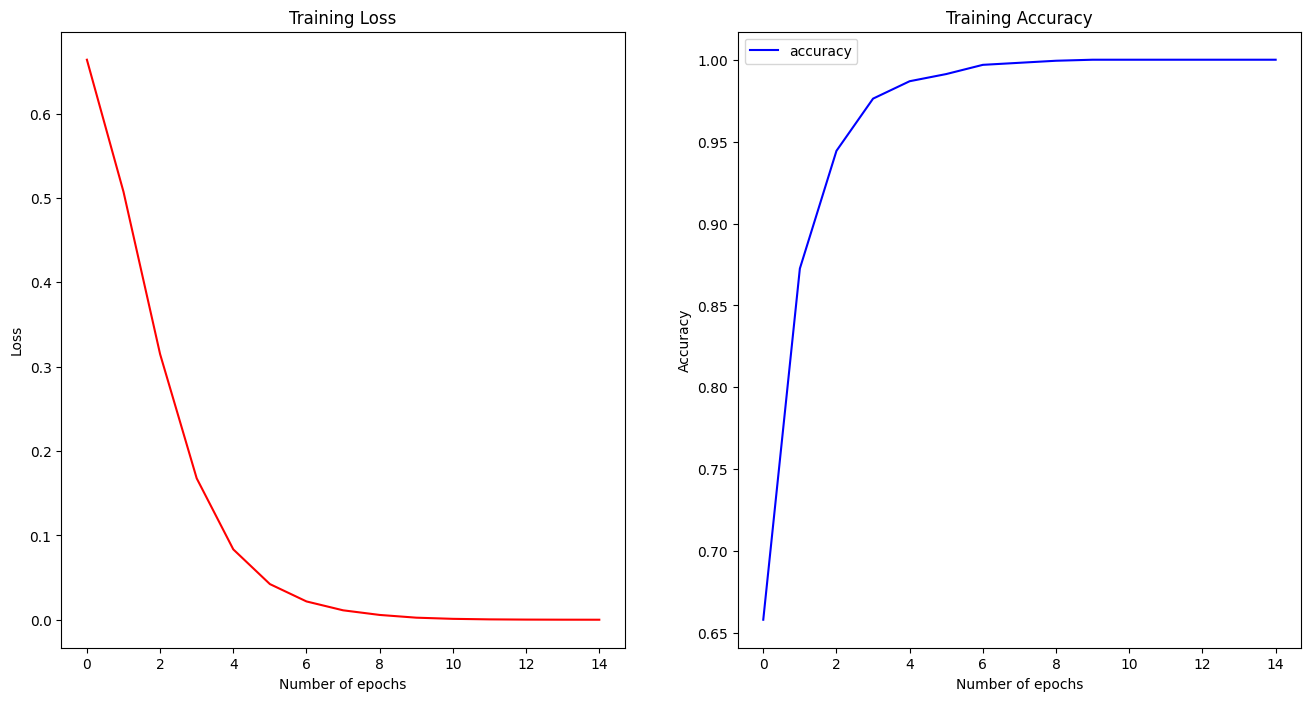

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Model 2
Same configuration as Model 1 just changing optimizer adam

In [ ]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
160/160 [==============================] - 2s 4ms/step - loss: 0.6640 - accuracy: 0.6081
Epoch 2/15
160/160 [==============================] - 1s 4ms/step - loss: 0.4567 - accuracy: 0.8769
Epoch 3/15
160/160 [==============================] - 1s 4ms/step - loss: 0.1945 - accuracy: 0.9894
Epoch 4/15
160/160 [==============================] - 1s 4ms/step - loss: 0.0564 - accuracy: 0.9987
Epoch 5/15
160/160 [==============================] - 1s 4ms/step - loss: 0.0208 - accuracy: 0.9994
Epoch 6/15
160/160 [==============================] - 1s 5ms/step - loss: 0.0098 - accuracy: 0.9994
Epoch 7/15
160/160 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 8/15
160/160 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 9/15
160/160 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 10/15
160/160 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                273712    
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273857 (1.04 MB)
Trainable params: 273857 (1.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

13/13 [==============================] - 0s 5ms/step - loss: 0.4348 - accuracy: 0.8275
Test loss: 0.43483778834342957
Test accuracy: 0.8274999856948853


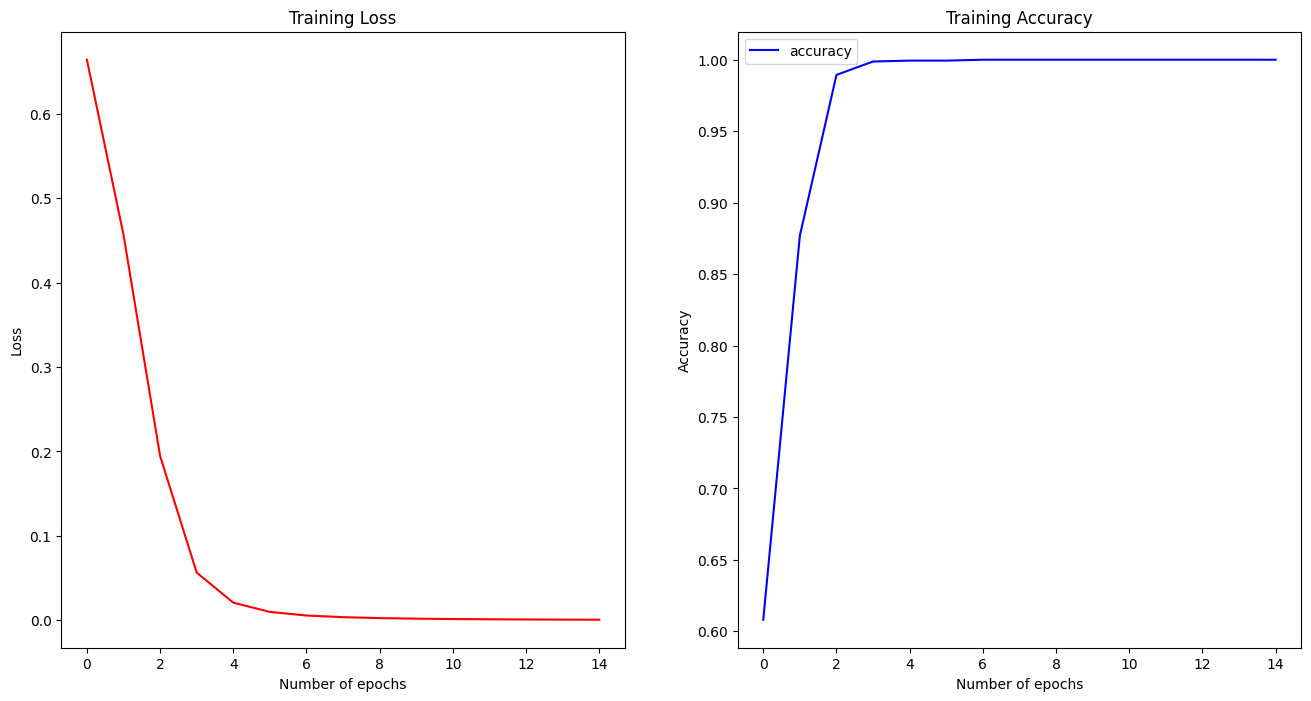

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Model 3
Same configuration just replace  ist dense layer with LSTM layer

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=16, input_shape=(x_train.shape[1], 1)))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, batch_size=10, epochs=15)

model.summary()

test_loss, test_acc = model.evaluate(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/15
160/160 [==============================] - 63s 368ms/step - loss: 0.6933 - accuracy: 0.4700
Epoch 2/15
160/160 [==============================] - 60s 378ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 3/15
160/160 [==============================] - 59s 372ms/step - loss: 0.6932 - accuracy: 0.5025
Epoch 4/15
160/160 [==============================] - 60s 376ms/step - loss: 0.6932 - accuracy: 0.5025
Epoch 5/15
160/160 [==============================] - 59s 369ms/step - loss: 0.6932 - accuracy: 0.4913
Epoch 6/15
160/160 [==============================] - 59s 367ms/step - loss: 0.6932 - accuracy: 0.4988
Epoch 7/15
160/160 [==============================] - 59s 371ms/step - loss: 0.6932 - accuracy: 0.5025
Epoch 8/15
160/160 [==============================] - 61s 381ms/step - loss: 0.6932 - accuracy: 0.5025
Epoch 9/15
160/160 [==============================] - 59s 369ms/step - loss: 0.6932 - accuracy: 0.5025
Epoch 10/15
160/160 [==============================] - 61s 379ms/step - l